In [1]:
import pandas as pd

file = open("E:\数据科学导引实验\个人信用风险评估数据集\credit.csv")

credit = pd.read_csv(file)

credit.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2


In [2]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
d

In [3]:
credit.describe()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,dependents,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [4]:
credit.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [5]:
col_dicts = {}
cols = ['checking_balance','credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status', 
        'other_debtors','property','installment_plan','housing','job','telephone','foreign_worker']

col_dicts = {'checking_balance': {'1 - 200 DM': 2,
  '< 0 DM': 1,
  '> 200 DM': 3,
  'unknown': 0},
 'credit_history': {'critical': 0,
  'delayed': 2,
  'fully repaid': 3,
  'fully repaid this bank': 4,
  'repaid': 1},
 'employment_length': {'0 - 1 yrs': 1,
  '1 - 4 yrs': 2,
  '4 - 7 yrs': 3,
  '> 7 yrs': 4,
  'unemployed': 0},
 'foreign_worker': {'no': 1, 'yes': 0},
 'housing': {'for free': 1, 'own': 0, 'rent': 2},
 'installment_plan': {'bank': 1, 'none': 0, 'stores': 2},
 'job': {'mangement self-employed': 3,
  'skilled employee': 2,
  'unemployed non-resident': 0,
  'unskilled resident': 1},
 'other_debtors': {'co-applicant': 2, 'guarantor': 1, 'none': 0},
 'personal_status': {'divorced male': 2,
  'female': 1,
  'married male': 3,
  'single male': 0},
 'property': {'building society savings': 1,
  'other': 3,
  'real estate': 0,
  'unknown/none': 2},
 'purpose': {'business': 5,
  'car (new)': 3,
  'car (used)': 4,
  'domestic appliances': 6,
  'education': 1,
  'furniture': 2,
  'others': 8,
  'radio/tv': 0,
  'repairs': 7,
  'retraining': 9},
 'savings_balance': {'101 - 500 DM': 2,
  '501 - 1000 DM': 3,
  '< 100 DM': 1,
  '> 1000 DM': 4,
  'unknown': 0},
 'telephone': {'none': 1, 'yes': 0}}

for col in cols:
    credit[col] = credit[col].map(col_dicts[col])
    
credit.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,1,6,0,0,1169,0,4,4,0,0,...,0,67,0,0,2,2,1,0,0,1
1,2,48,1,0,5951,1,2,2,1,0,...,0,22,0,0,1,2,1,1,0,2
2,0,12,0,1,2096,1,3,2,0,0,...,0,49,0,0,1,1,2,1,0,1
3,1,42,1,2,7882,1,3,2,0,1,...,1,45,0,1,1,2,2,1,0,1
4,1,24,2,3,4870,1,2,3,0,0,...,2,53,0,1,2,2,2,1,0,2


In [6]:
from sklearn import model_selection

y = credit['default']
#del credit['default']
X  = credit.loc[:,'checking_balance':'foreign_worker']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.columns)

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'job',
       'dependents', 'telephone', 'foreign_worker'],
      dtype='object')


In [7]:
print (y_train.value_counts()/len(y_train))
print (y_test.value_counts()/len(y_test))
print(y_train.value_counts())

1    0.694286
2    0.305714
Name: default, dtype: float64
1    0.713333
2    0.286667
Name: default, dtype: float64
1    486
2    214
Name: default, dtype: int64


(-1.0, 9.98000000000001, -1.0, 9.98000000000001)

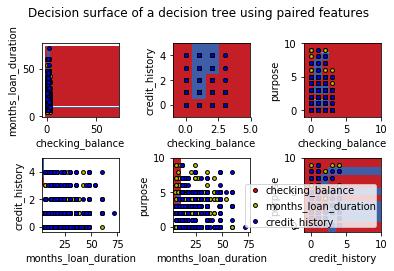

In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = credit.iloc[:, pair]
    y = credit['default']

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 1].max() + 1
    y_min, y_max = X.values[:, 0].min() - 1, X.values[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.values[idx, 0], X.values[idx, 1], c=color,label = credit.columns[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
credit_model = DecisionTreeClassifier(criterion='entropy',min_samples_leaf = 6,random_state=1)
credit_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [12]:
list(zip(X_train.columns,credit_model.feature_importances_))

[('checking_balance', 0.1784263521005156),
 ('months_loan_duration', 0.06531501926631156),
 ('credit_history', 0.07396106738202872),
 ('purpose', 0.04628571645014363),
 ('amount', 0.13497578880485295),
 ('savings_balance', 0.05368602270859771),
 ('employment_length', 0.053266897842204876),
 ('installment_rate', 0.032551832085956384),
 ('personal_status', 0.010488591098276568),
 ('other_debtors', 0.0911632319197171),
 ('residence_history', 0.004046006705158203),
 ('property', 0.06152610458217522),
 ('age', 0.1179438710337618),
 ('installment_plan', 0.028054660763281884),
 ('housing', 0.013923676945832424),
 ('existing_credits', 0.01970767408219164),
 ('job', 0.0),
 ('dependents', 0.0),
 ('telephone', 0.014677486228993656),
 ('foreign_worker', 0.0)]

In [13]:
credit_pred = credit_model.predict(X_test)

from sklearn import metrics
print ('回归评估报告：')
print (metrics.classification_report(y_test, credit_pred))
print ('混淆矩阵：')
print (metrics.confusion_matrix(y_test, credit_pred))
print ('正确率：')
print (metrics.accuracy_score(y_test, credit_pred))

回归评估报告：
             precision    recall  f1-score   support

          1       0.78      0.84      0.81       214
          2       0.51      0.42      0.46        86

avg / total       0.70      0.72      0.71       300

混淆矩阵：
[[179  35]
 [ 50  36]]
正确率：
0.7166666666666667


In [14]:
class_weights = {1:1, 2:4}
credit_model_cost = DecisionTreeClassifier(criterion='entropy',max_depth=6,class_weight = class_weights)
credit_model_cost.fit(X_train, y_train)
credit_pred_cost = credit_model_cost.predict(X_test)

print (metrics.classification_report(y_test, credit_pred_cost))
print (metrics.confusion_matrix(y_test, credit_pred_cost))
print (metrics.accuracy_score(y_test, credit_pred_cost))

             precision    recall  f1-score   support

          1       0.88      0.44      0.59       214
          2       0.38      0.85      0.53        86

avg / total       0.74      0.56      0.57       300

[[ 95 119]
 [ 13  73]]
0.56
